In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns 
BASEPATH='../input/agriculture-master-competition'

In [27]:
def read_csvfile(filepath):
    df = pd.read_csv(filepath)
    return df
input_df = read_csvfile(os.path.join(BASEPATH,"train_data.csv"))
input_df.info()
labelcolumns = list(input_df.columns[20:])
featurecolumns = list(input_df.columns[2:20])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28493 entries, 0 to 28492
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  28493 non-null  int64  
 1   d.log_time             28493 non-null  object 
 2   d.temperature_A        28493 non-null  float64
 3   d.temperature_B        28493 non-null  float64
 4   d.humidity_A           28493 non-null  float64
 5   d.humidity_B           28493 non-null  float64
 6   d.photometric          28493 non-null  int64  
 7   d.CO2                  28493 non-null  int64  
 8   d.soil_temperature     28493 non-null  float64
 9   d.soil_humidity        28493 non-null  float64
 10  d.soil_EC              28493 non-null  float64
 11  d.soil_PH              28493 non-null  float64
 12  d.outside_photometric  28493 non-null  int64  
 13  d.outside_temperature  28493 non-null  float64
 14  d.outside_humidity     28493 non-null  float64
 15  d.

In [28]:
input_df[featurecolumns].describe()

,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall_detect,d.rainfall
count,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.0,28493.000000
mean,28.002109,26.713484,69.650862,80.268452,6411.977889,454.088899,24.755951,47.510834,0.606850,7.372358,8818.033342,26.511912,68.356105,0.481416,166.147685,199.343383,0.0,0.004226
std,6.398441,5.569665,14.808369,12.576656,9743.290448,35.413986,4.422882,4.636636,0.147852,0.810796,15242.527755,5.806157,12.670670,102.624290,115.432005,266.952227,0.0,0.111511
min,10.000000,9.300000,22.800000,43.900000,0.000000,376.000000,7.300000,36.600000,0.131000,6.300000,0.000000,8.700000,22.300000,-9999.000000,0.000000,0.000000,0.0,0.000000
25%,23.400000,22.700000,57.100000,69.900000,0.000000,428.000000,21.700000,44.800000,0.519000,6.600000,0.000000,22.300000,59.100000,0.000000,42.000000,0.000000,0.0,0.000000
50%,27.500000,26.800000,72.900000,82.700000,23.000000,449.000000,25.000000,47.500000,0.644000,7.600000,38.000000,26.200000,69.100000,1.100000,174.000000,0.000000,0.0,0.000000
75%,32.300000,30.400000,82.000000,90.800000,11310.000000,474.000000,27.700000,50.500000,0.708000,8.000000,12058.000000,30.000000,77.500000,2.100000,273.000000,353.000000,0.0,0.000000
max,50.600000,41.400000,93.800000,99.900000,65530.000000,602.000000,35.200000,62.600000,1.209000,9.200000,65500.000000,42.500000,98.000000,12.600000,359.000000,990.000000,0.0,9.200000


因為 `d.rainfall_detect` feature 都是 0 所以直接刪掉了

In [29]:
featurecolumns.remove("d.rainfall_detect")

freq = 1 每個時間點都只有一筆資料，所以沒有單個時間點多筆資料的問題

In [6]:
input_df.describe(include=['O'])

,d.log_time
count,28493
unique,28493
top,2020/9/24 22:15
freq,1


In [7]:
for lc in labelcolumns:
    newgroup=list(featurecolumns)
    newgroup.append(lc)
    display(input_df[newgroup].groupby(lc).mean())

,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator01,,,,,,,,,,,,,,,,,
0,16.929021,15.729371,62.709266,73.947378,2674.571678,429.465035,13.380420,44.539860,0.627510,6.719580,5065.784965,15.313287,61.970804,3.988462,76.173077,102.291958,0.000000
1,28.228957,26.938509,69.793070,80.397948,6488.543784,454.593353,24.988994,47.571699,0.606426,7.385731,8894.903299,26.741331,68.486917,0.409570,167.990939,201.331614,0.004312


,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator02,,,,,,,,,,,,,,,,,
0,12.820608,11.511824,57.384797,67.968581,2305.341216,426.375000,8.980068,42.687838,0.598517,6.869595,2282.439189,10.948311,58.546284,3.778378,84.983108,96.239865,0.00000
1,28.161478,26.873065,69.779625,80.397571,6455.087598,454.379828,24.921559,47.561464,0.606937,7.377636,8886.641203,26.675292,68.459084,0.446806,166.999716,200.425719,0.00427


,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator03,,,,,,,,,,,,,,,,,
0,12.729153,11.425763,57.408136,67.984407,2251.471186,426.400000,8.901356,42.644746,0.598254,6.866780,2252.983051,10.861356,58.560339,3.785424,85.003390,94.806780,0.00000
1,28.161891,26.873420,69.778942,80.396964,6455.504007,454.378573,24.921817,47.561742,0.606940,7.377647,8886.715157,26.675644,68.458586,0.446851,166.996596,200.437017,0.00427


,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator04,,,,,,,,,,,,,,,,,
0,15.680189,14.588491,63.248679,74.181132,2090.241509,429.024528,12.423585,44.174906,0.631758,6.731509,2092.233962,14.174906,62.443774,4.140755,69.152830,81.369811,0.000000
1,28.235654,26.943296,69.772206,80.383829,6493.890427,454.563960,24.989694,47.574062,0.606378,7.384505,8945.511569,26.745743,68.468165,0.412059,167.986089,201.579409,0.004306


,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator05,,,,,,,,,,,,,,,,,
0,22.460825,21.706146,78.499363,88.079070,1688.219269,466.766888,21.155676,47.165947,0.604352,7.050637,1881.405316,21.274972,74.332780,1.691085,152.403101,60.741971,0.007641
1,28.806543,27.440404,68.366316,79.134577,7097.730718,452.248422,25.278606,47.560902,0.607212,7.419063,9825.030666,27.272163,67.488465,0.305808,168.143001,219.464290,0.003730


,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator06,,,,,,,,,,,,,,,,,
0,22.399417,21.667408,78.610864,88.119894,1594.053904,466.976382,21.141039,47.160017,0.604620,7.051681,1756.915532,21.232231,74.406335,1.693470,151.918311,59.221173,0.007669
1,28.812107,27.443010,68.355487,79.133345,7108.519563,452.225717,25.278569,47.561553,0.607172,7.418719,9838.880252,27.275211,67.481405,0.306186,168.204869,219.601269,0.003728


,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator07,,,,,,,,,,,,,,,,,
0,22.391377,21.660946,78.623366,88.120807,1581.650348,466.985257,21.138720,47.158331,0.604620,7.052017,1741.239499,21.224423,74.419833,1.694381,151.860640,58.930737,0.007677
1,28.812238,27.443016,68.355330,79.134657,7109.424572,452.226805,25.278239,47.561732,0.607172,7.418612,9839.845289,27.275367,67.480569,0.306278,168.210579,219.617439,0.003727


,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator08,,,,,,,,,,,,,,,,,
0,33.804925,31.838212,62.292257,74.025821,10489.351365,436.561214,28.711887,46.178194,0.563554,7.963716,15208.222607,31.889102,64.866950,0.414458,178.585641,357.22498,0.004984
1,24.809787,23.894201,73.699075,83.702731,4168.879005,463.731462,22.579658,48.243964,0.630668,7.047032,5302.577499,23.553740,70.275605,0.518253,159.305152,112.48746,0.003808


,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator09,,,,,,,,,,,,,,,,,
0,24.986026,23.662030,70.424770,81.897203,4847.057104,452.593389,22.110329,47.065145,0.625382,7.036084,7049.750609,23.369245,68.199438,-0.371480,159.087827,154.725924,0.004217
1,29.496221,28.225118,69.267482,79.461599,7187.210769,454.829747,26.066542,47.731621,0.597669,7.538942,9694.007977,28.068731,68.433715,0.903926,169.645009,221.446048,0.004230


,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator10,,,,,,,,,,,,,,,,,
0,27.886255,26.627808,69.977171,80.504566,6196.375707,454.523742,24.742877,47.446319,0.606772,7.375408,8475.068141,26.424859,68.622136,0.424019,166.667543,192.251798,0.004066
1,30.903656,28.859232,61.478519,74.355027,11811.689214,443.198355,25.083364,49.126600,0.608785,7.295978,17407.524680,28.692139,61.693419,1.918921,153.127971,376.950640,0.008227


,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall
actuator11,,,,,,,,,,,,,,,,,
0,27.878068,26.617289,69.981127,80.506620,6200.516540,454.621972,24.724049,47.433750,0.606341,7.370995,8484.481480,26.399194,68.659008,0.444682,166.158382,192.209820,0.004284
1,32.841994,30.466854,56.764466,70.975562,14662.831461,433.289326,26.000702,50.518539,0.626702,7.425562,21832.646067,30.909972,56.537360,1.914747,165.730337,477.682584,0.001966


Actuator1-4 很相似 

Actuator5-7也很相似

In [8]:
for lc in labelcolumns:  
    display(input_df[labelcolumns].groupby(lc).mean())  

,actuator02,actuator03,actuator04,actuator05,actuator06,actuator07,actuator08,actuator09,actuator10,actuator11
actuator01,,,,,,,,,,
0,0.484266,0.484266,0.073427,0.141608,0.141608,0.141608,0.949301,0.073427,0.054196,0.005245
1,0.999964,1.000000,1.000000,0.888220,0.888686,0.888829,0.638874,0.680921,0.038072,0.025393


,actuator01,actuator03,actuator04,actuator05,actuator06,actuator07,actuator08,actuator09,actuator10,actuator11
actuator02,,,,,,,,,,
0,0.003378,0.003378,0.003378,0.020270,0.020270,0.020270,0.993243,0.006757,0.030405,0.010135
1,0.990176,1.000000,0.991666,0.882186,0.882647,0.882789,0.641451,0.675675,0.038479,0.025145


,actuator01,actuator02,actuator04,actuator05,actuator06,actuator07,actuator08,actuator09,actuator10,actuator11
actuator03,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.016949,0.016949,0.016949,0.996610,0.003390,0.030508,0.010169
1,0.990177,0.999965,0.991666,0.882190,0.882651,0.882793,0.641428,0.675686,0.038478,0.025144


,actuator01,actuator02,actuator03,actuator05,actuator06,actuator07,actuator08,actuator09,actuator10,actuator11
actuator04,,,,,,,,,,
0,0.000000,0.443396,0.443396,0.075472,0.075472,0.075472,0.998113,0.030189,0.033962,0.005660
1,0.998498,0.999964,1.000000,0.888352,0.888817,0.888960,0.638415,0.680828,0.038479,0.025355


,actuator01,actuator02,actuator03,actuator04,actuator06,actuator07,actuator08,actuator09,actuator10,actuator11
actuator05,,,,,,,,,,
0,0.864064,0.919712,0.919712,0.864341,0.004707,0.004707,0.979513,0.421927,0.035437,0.013843
1,0.996745,0.999759,0.999799,0.998392,0.999839,1.000000,0.596560,0.704554,0.038825,0.026607


,actuator01,actuator02,actuator03,actuator04,actuator05,actuator07,actuator08,actuator09,actuator10,actuator11
actuator06,,,,,,,,,,
0,0.863573,0.919422,0.919422,0.863851,0.001111,0.001111,0.979161,0.423451,0.035288,0.013893
1,0.996746,0.999759,0.999799,0.998393,0.999317,1.000000,0.596810,0.704186,0.038845,0.026593


,actuator01,actuator02,actuator03,actuator04,actuator05,actuator06,actuator08,actuator09,actuator10,actuator11
actuator07,,,,,,,,,,
0,0.863421,0.919332,0.919332,0.863700,0.000000,0.000000,0.979416,0.423922,0.035327,0.013908
1,0.996747,0.999759,0.999799,0.998393,0.999317,0.999839,0.596835,0.704073,0.038838,0.026588


,actuator01,actuator02,actuator03,actuator04,actuator05,actuator06,actuator07,actuator09,actuator10,actuator11
actuator08,,,,,,,,,,
0,0.997132,0.999802,0.999901,0.999901,0.992682,0.992583,0.992682,0.877868,0.039755,0.033030
1,0.970459,0.984005,0.984005,0.971220,0.807519,0.808280,0.808444,0.553670,0.037648,0.020565


,actuator01,actuator02,actuator03,actuator04,actuator05,actuator06,actuator07,actuator08,actuator10,actuator11
actuator09,,,,,,,,,,
0,0.943850,0.968853,0.968853,0.945545,0.778790,0.780167,0.780591,0.869160,0.036974,0.026592
1,0.997796,0.999895,0.999948,0.999160,0.920017,0.920017,0.920017,0.534114,0.039099,0.024194


,actuator01,actuator02,actuator03,actuator04,actuator05,actuator06,actuator07,actuator08,actuator09,actuator11
actuator10,,,,,,,,,,
0,0.980255,0.989525,0.989562,0.981313,0.872842,0.873280,0.873426,0.645608,0.668236,0.024161
1,0.971664,0.991773,0.991773,0.983547,0.882998,0.883912,0.883912,0.632541,0.680987,0.045704


,actuator01,actuator02,actuator03,actuator04,actuator05,actuator06,actuator07,actuator08,actuator09,actuator10
actuator11,,,,,,,,,,
0,0.979518,0.989453,0.989489,0.981030,0.871783,0.872251,0.872395,0.648033,0.669270,0.037580
1,0.995787,0.995787,0.995787,0.995787,0.929775,0.929775,0.929775,0.530899,0.647472,0.070225


Label 資料不均很嚴重 1跟0數量差異很大

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


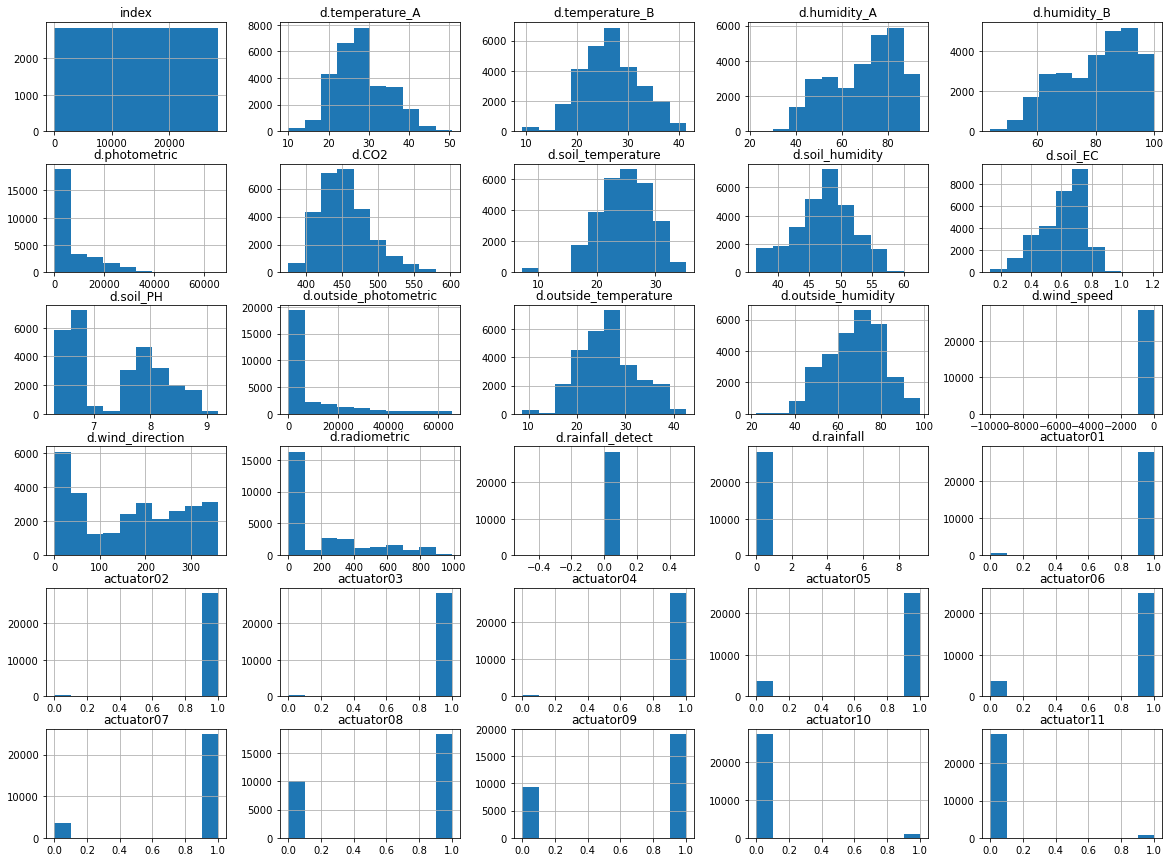

In [30]:
def showDataHist():
    fig,ax = plt.subplots(figsize = (20,15))
    ax = fig.gca()
    input_df.hist(ax=ax)
    plt.show()
showDataHist()

actuator01
[0, 1]
[572, 27921]
actuator02
[0, 1]
[296, 28197]
actuator03
[0, 1]
[295, 28198]
actuator04
[0, 1]
[530, 27963]
actuator05
[0, 1]
[3612, 24881]
actuator06
[0, 1]
[3599, 24894]
actuator07
[0, 1]
[3595, 24898]
actuator08
[0, 1]
[10112, 18381]
actuator09
[0, 1]
[9439, 19054]
actuator10
[0, 1]
[27399, 1094]
actuator11
[0, 1]
[27781, 712]


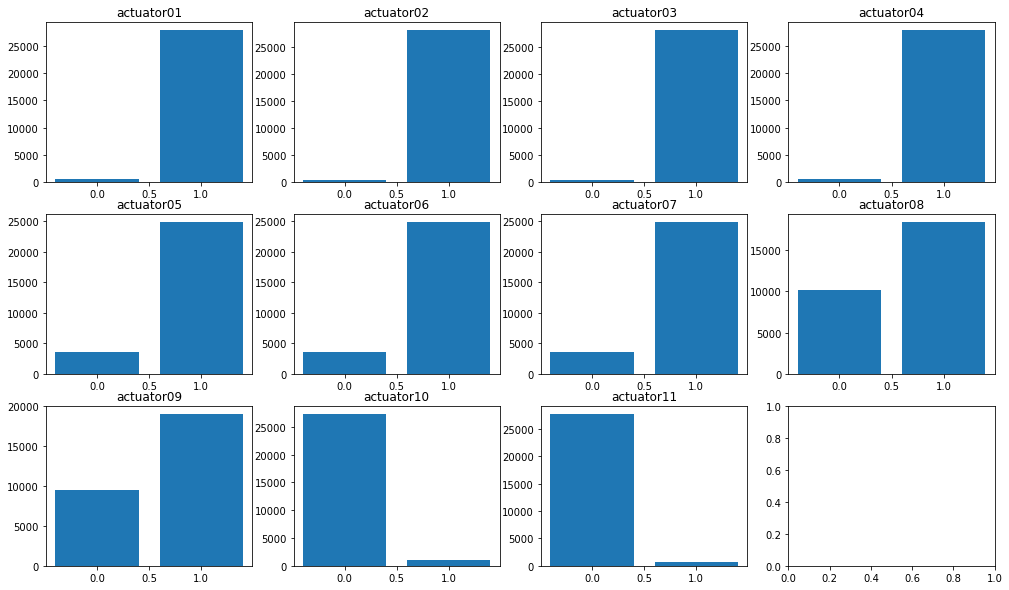

In [10]:
def showactuatorplot():
    fig,ax =  plt.subplots(3,4,figsize=(17,10))
    plotindex=0
    for colname in input_df.columns[20:]:
        x = list(set(input_df[colname]))
        y=[]
        sorted(x) 
        for i in x:
            y.append(len(input_df[input_df[colname] == i]))
        print(colname)
        print(x[:10])
        print(y[:10])
        
        ax[plotindex//4,plotindex%4].bar(x,y)
        ax[plotindex//4,plotindex%4].set_title(colname)
        plotindex+=1
    fig.show()
showactuatorplot()

Actuator1-4 and Actuator5-7正相關性很強 可能控制的東西差不多類型

Actuator8 對於 temperature 有負相關 可能跟是根據溫度變化控制的儀器


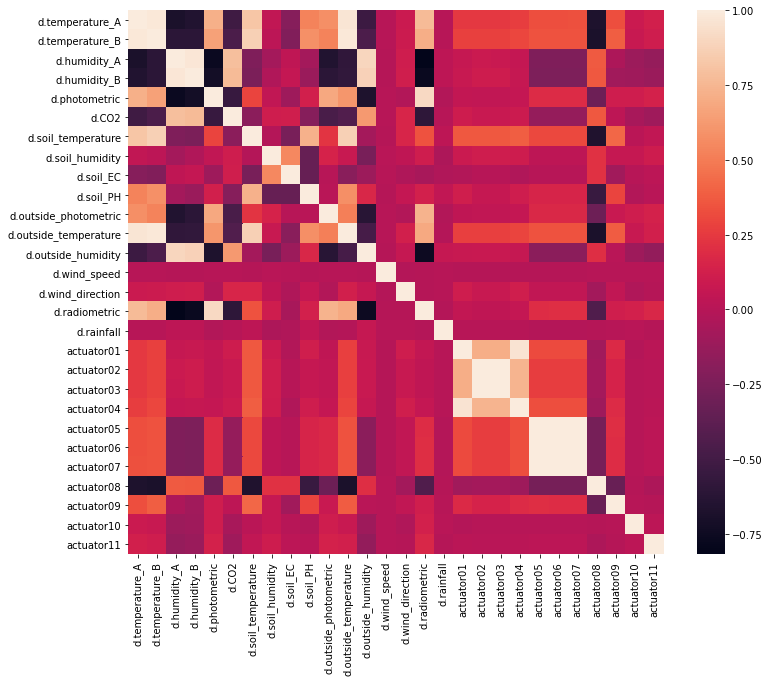

In [32]:
def showCorrelation(df):
    plt.figure(figsize=(12,10))
    ax = sns.heatmap(df.corr())
showCorrelation(input_df[featurecolumns+labelcolumns])

['d.temperature_A', 'd.temperature_B', 'd.humidity_A', 'd.humidity_B', 'd.photometric', 'd.CO2', 'd.soil_temperature', 'd.soil_humidity', 'd.soil_EC', 'd.soil_PH', 'd.outside_photometric', 'd.outside_temperature', 'd.outside_humidity', 'd.wind_speed', 'd.wind_direction', 'd.radiometric', 'd.rainfall']


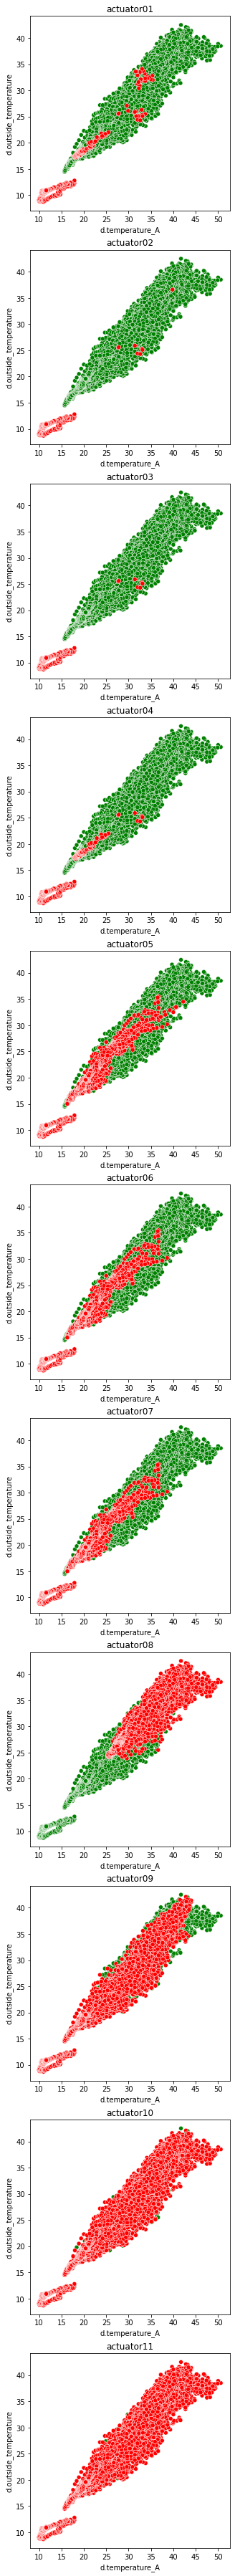

In [31]:
def showrelationplot_2(featurename1,featurename2,actuatorname=None):
    if actuatorname != None:
        x = input_df[input_df[actuatorname] == 1][[featurename1,featurename2,actuatorname]]
        x=x.append(input_df[input_df[actuatorname] == 0][[featurename1,featurename2,actuatorname]] )
        colors = ['r' if a == 0 else 'g' for a in x[actuatorname]] 
        fig , ax = plt.subplots()
        sns.scatterplot(x[featurename1],x[featurename2],ax=ax,c=colors)
        fig.show()
    else:
        fig , ax = plt.subplots(11,1,figsize=(5,65))
        for idx,lc in enumerate(labelcolumns):
            actuatorname=lc
            x = input_df[input_df[actuatorname] == 1][[featurename1,featurename2,actuatorname]]
            x=x.append(input_df[input_df[actuatorname] == 0][[featurename1,featurename2,actuatorname]] )
            colors = ['r' if a == 0 else 'g' for a in x[actuatorname]] 
            ax[idx].set_title(actuatorname)
            sns.scatterplot(x=x[featurename1],y=x[featurename2],ax=ax[idx],c=colors)
            fig.show()
print(featurecolumns)
showrelationplot_2("d.temperature_A","d.outside_temperature")

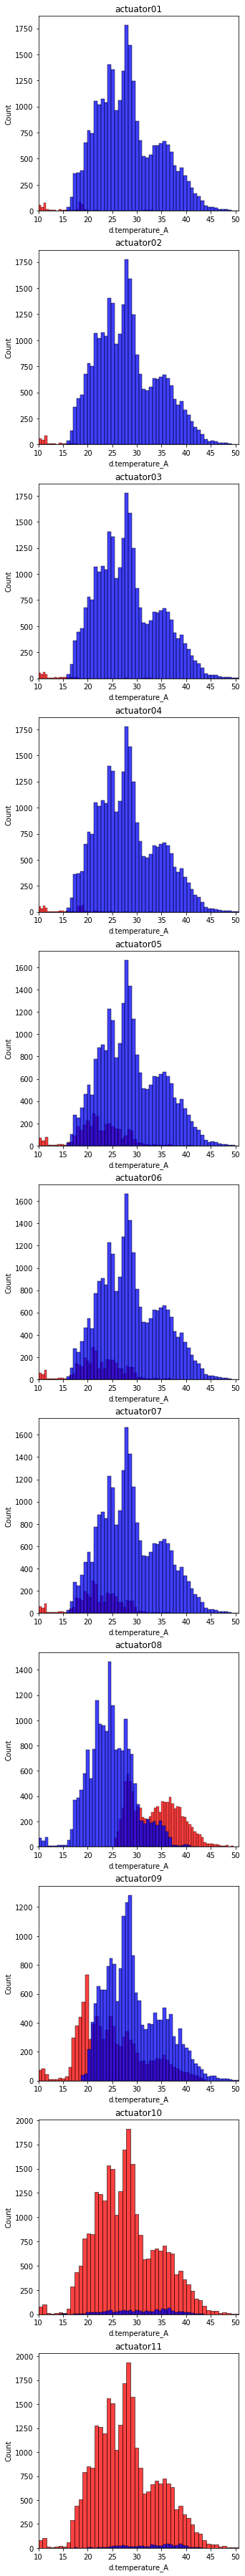

In [20]:
def showrelationplot_2(featureindex):
    fig,ax =  plt.subplots(11,1,figsize=(5,65))
    plotindex=0
    for colname in labelcolumns:
        x1 = input_df[input_df[colname] == 0][featurecolumns[featureindex]]
        x2 = input_df[input_df[colname] == 1][featurecolumns[featureindex]]
        binsx =  50 #max(int(x1.max()-x1.min()),int(x2.max()-x2.min()))
        
        ax[plotindex%11].axis(xmin=min(x1.min(),x2.min()), xmax=max(x1.max(),x2.max()))
        sns.histplot(x=x1,ax=ax[plotindex%11],bins=binsx,color='red')
        
        ax[plotindex%11].axis(xmin=min(x1.min(),x2.min()), xmax=max(x1.max(),x2.max()))
        sns.histplot(x=x2,ax=ax[plotindex%11],bins=binsx,color='blue')
        
        ax[plotindex%11].set_title(colname)
        plotindex+=1
    fig.show()
showrelationplot(0)

In [24]:
def dataNormalized(feature_df,zeromean=True):
    if zeromean:
        feature_df = (feature_df - feature_df.mean())/feature_df.std()
    else:
        feature_df=(feature_df-feature_df.min())/(feature_df.max()-feature_df.min())
    feature_df["d.rainfall_detect"]=0
    return feature_df
normalized_df = dataNormalized(input_df[featurecolumns],False)
normalized_df.describe()

,d.temperature_A,d.temperature_B,d.humidity_A,d.humidity_B,d.photometric,d.CO2,d.soil_temperature,d.soil_humidity,d.soil_EC,d.soil_PH,d.outside_photometric,d.outside_temperature,d.outside_humidity,d.wind_speed,d.wind_direction,d.radiometric,d.rainfall,d.rainfall_detect
count,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.0
mean,0.443402,0.542476,0.659871,0.649437,0.097848,0.345526,0.625661,0.419647,0.441419,0.369779,0.134626,0.526980,0.608403,0.998790,0.462807,0.201357,0.000459,0.0
std,0.157597,0.173510,0.208569,0.224583,0.148684,0.156699,0.158526,0.178332,0.137154,0.279585,0.232710,0.171780,0.167380,0.010251,0.321538,0.269649,0.012121,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.330049,0.417445,0.483099,0.464286,0.000000,0.230088,0.516129,0.315385,0.359926,0.103448,0.000000,0.402367,0.486129,0.998741,0.116992,0.000000,0.000000,0.0
50%,0.431034,0.545171,0.705634,0.692857,0.000351,0.323009,0.634409,0.419231,0.475881,0.448276,0.000580,0.517751,0.618230,0.998851,0.484680,0.000000,0.000000,0.0
75%,0.549261,0.657321,0.833803,0.837500,0.172593,0.433628,0.731183,0.534615,0.535250,0.586207,0.184092,0.630178,0.729194,0.998951,0.760446,0.356566,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
